In [93]:
from sklearn import preprocessing, metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../../Dataset/Processed dataset/processed_data.csv')
train_df = pd.read_csv("../../Dataset/Processed dataset/train_data.csv")
test_df = pd.read_csv("../../Dataset/Processed dataset/test_data.csv")
validation_df = pd.read_csv("../../Dataset/Processed dataset/validation_data.csv")

In [13]:
X = df['sentence']
y = df['label']

In [19]:
flat_array = X.to_numpy()
flat_array = flat_array.flatten()

flat_array_clean = np.array([
    str(text) if not pd.isna(text) else "" 
    for text in flat_array
])

vectorizer = TfidfVectorizer(max_features=2500, min_df=0.0, max_df=0.8)
X_vectorized = vectorizer.fit_transform(flat_array_clean)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=0)

In [25]:
# Train and evaluate each model
accuracies = {}
predictions = {}

In [65]:
# Initialize the classifiers
classifiers = {
    'LinearSVC': LinearSVC(C=1.0, random_state=0),
    'RandomForest': RandomForestClassifier(max_features='log2', n_estimators=1000, criterion = 'entropy', random_state = 0),
    'LogisticRegression': LogisticRegression(C=1.0, penalty='l2', solver='newton-cg', random_state = 0),
    'MultinomialNB': MultinomialNB(alpha=1, fit_prior=False),
    'DecisionTree': DecisionTreeClassifier(criterion='gini', max_features=None,min_samples_leaf=1,min_samples_split=2, random_state=0)
}

In [67]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    joblib.dump(classifier, f'{name}_model.joblib')

In [78]:
for name, classifier in classifiers.items():
    classifier = joblib.load(str(name)+'_model.joblib')
    y_pred = classifier.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    predictions[name] = y_pred.astype(str)

In [104]:
# Print the accuracies
for name, accuracy in accuracies.items():
    print(f'{name} Accuracy: {accuracy}')

LinearSVC Accuracy: 0.9034731116927475
LogisticRegression Accuracy: 0.8997976647918174
MultinomialNB Accuracy: 0.8838150396317128
DecisionTree Accuracy: 0.8388000965268884


In [98]:
# Print the F1 score
for name, preds in predictions.items():
    preds_str = preds.astype(str)  
    y_test_str = y_test.astype(str)
    f1 = f1_score(y_test_str, preds_str, average='macro')  # Change average as per your requirement
    print(f'{name} F1 Score: {f1}')

LinearSVC F1 Score: 0.8871241333275481
LogisticRegression F1 Score: 0.8832993467812625
MultinomialNB F1 Score: 0.8700681696404707
DecisionTree F1 Score: 0.8144237029371105


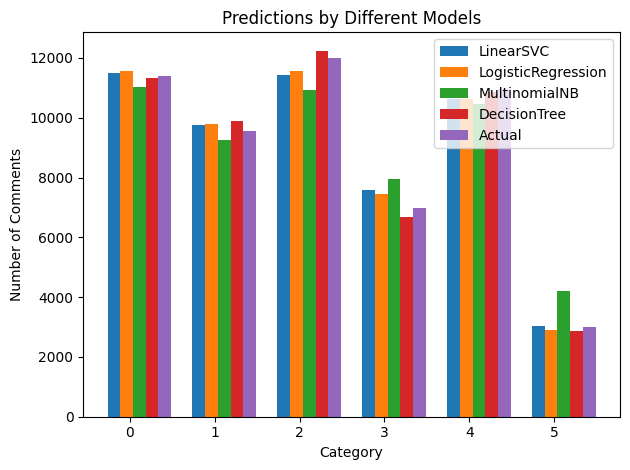

In [95]:
# Get the counts of each category in y_test
unique_labels = np.unique(y_test)
actual_counts = np.bincount(y_test.astype(int), minlength=len(unique_labels))

# Plot the number of comments predicted in each category for all models
categories = ['0', '1', '2','3', '4', '5']
num_models = len(classifiers)
bar_width = 0.15
index = np.arange(len(categories))
offset = bar_width * ((num_models + 1) / 2)

plt.figure()

# Plot the predictions of each model
for i, (name, preds) in enumerate(predictions.items()):
    counts = np.zeros((len(categories),))
    for j, category in enumerate(categories):
        counts[j] = np.sum(preds == category)
    plt.bar(index + (i * bar_width) - offset, counts, bar_width, label=name)

# Plot the actual counts
plt.bar(index + (num_models * bar_width) - offset, actual_counts, bar_width, label='Actual')

plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.title('Predictions by Different Models')
plt.xticks(index - (offset / 2), unique_labels)
plt.legend()
plt.tight_layout()
plt.show()